# Proyek Sistem Rekomendasi
- **Nama:** Rasyid Naufal
- **Email:** rasyidnaufalsaputra03@gmail.com
- **ID Dicoding:** rasyidnfl


---



# **Sistem Rekomendasi Buku Menggunakan Content-Based dan Collaborative Filtering**

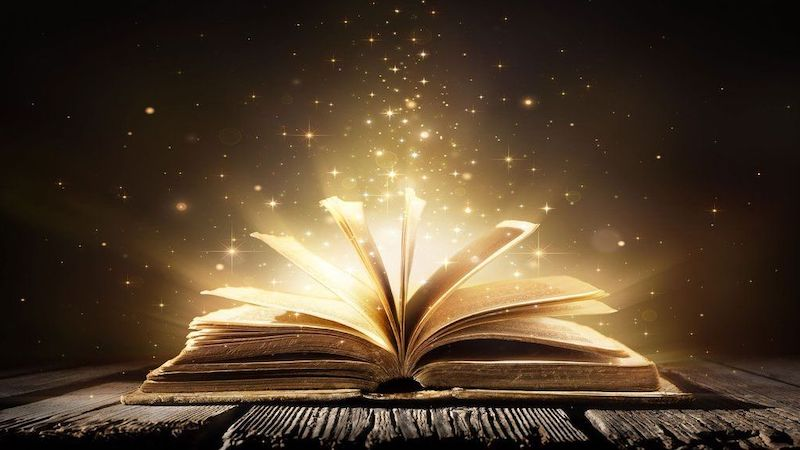

## ***Project Overview***

Minat baca masyarakat Indonesia masih menjadi tantangan besar. Berdasarkan laporan UNESCO, minat baca masyarakat Indonesia sangat memprihatinkan, yakni hanya 0,001%, yang berarti dari setiap 1.000 orang hanya 1 orang yang aktif membaca (UNESCO, 2016 dalam ResearchGate). Kondisi ini turut diperparah dengan keterbatasan akses terhadap bahan bacaan yang sesuai dengan minat individu, sehingga banyak orang kesulitan menemukan buku yang benar-benar menarik untuk dibaca.

Di era digital saat ini, sistem rekomendasi telah menjadi alat penting dalam membantu pengguna menemukan konten yang relevan dengan preferensi mereka. Salah satu contoh sukses adalah Amazon, yang menggunakan sistem rekomendasi berbasis machine learning untuk menyarankan produk, termasuk buku, kepada pengguna. Dengan mengandalkan data historis dan pola perilaku pengguna, algoritma tersebut terbukti meningkatkan kepuasan pelanggan dan engagement platform secara signifikan (Amazon Science, 2018).

Melalui proyek ini, penulis mengembangkan sebuah sistem rekomendasi buku berbasis machine learning menggunakan dua pendekatan utama: Content-Based Filtering dan Collaborative Filtering. Content-Based Filtering merekomendasikan buku yang mirip dengan buku yang disukai pengguna sebelumnya berdasarkan fitur konten seperti judul dan penulis, sementara Collaborative Filtering menyarankan buku berdasarkan pola perilaku pengguna lain yang memiliki preferensi serupa.
Diharapkan, sistem ini dapat membantu pembaca menemukan buku yang sesuai dengan minat mereka, sehingga pada akhirnya dapat meningkatkan budaya literasi di Indonesia melalui pendekatan teknologi yang lebih cerdas dan personal.


Referensi
1.	UNESCO. (2016). Literacy towards Indonesia's generation nowadays. Diakses dari ResearchGate
2.	Amazon Science. (2018). The history of Amazon's recommendation algorithm. Diakses dari Amazon Science


## ***Business Understanding***

fokus utama adalah mengidentifikasi permasalahan yang ingin diselesaikan melalui proyek sistem rekomendasi buku ini. Dengan pemahaman yang jelas terhadap masalah yang dihadapi, kita dapat merumuskan tujuan yang tepat agar solusi yang dikembangkan efektif dan relevan. Berikut adalah pernyataan masalah dan tujuan proyek yang akan menjadi landasan pengembangan sistem rekomendasi ini.

## ***Problem Statements***


* Masalah 1: Pembaca sering kesulitan menemukan buku yang sesuai dengan preferensi dan minat mereka karena banyaknya pilihan yang tersedia tanpa panduan yang jelas.

* Masalah 2: Kurangnya sistem rekomendasi yang mampu memberikan saran buku yang personal dan relevan berdasarkan data rating dan konten buku.

* Masalah 3: Pengguna sering kali merasa bingung memilih buku baru yang berkualitas dan sesuai kebutuhan bacaan mereka, sehingga mengurangi minat baca secara keseluruhan.

## ***Goals***


* Tujuan 1: Membangun sistem rekomendasi buku yang dapat membantu pembaca menemukan buku yang sesuai dengan minat mereka.

* Tujuan 2: Menerapkan dua pendekatan sistem rekomendasi utama, yaitu Content-Based Filtering dan Collaborative Filtering, untuk memberikan rekomendasi buku yang relevan dan beragam.

* Tujuan 3: Meningkatkan pengalaman pengguna dalam mencari buku baru dengan rekomendasi yang didasarkan pada rating pengguna lain dan kemiripan konten buku, sehingga dapat mendukung peningkatan budaya literasi.

## ***Solution Approach***
Dalam proyek ini menggunakan dua pendekatan sistem rekomendasi sebagai solusi untuk mencapai tujuan di atas:

* Content-Based Filtering
Sistem ini merekomendasikan buku kepada pengguna berdasarkan kesamaan fitur konten buku, seperti judul, terbitan, dan penulis, dengan buku yang sebelumnya telah disukai atau dirating tinggi oleh pengguna tersebut. Pendekatan ini efektif untuk memberikan rekomendasi yang personal tanpa bergantung pada data pengguna lain secara langsung.

* Collaborative Filtering
Pendekatan ini menggunakan pola rating dan interaksi dari banyak pengguna untuk menemukan kesamaan preferensi antar pengguna. Dengan demikian, buku yang disukai oleh pengguna lain yang memiliki taste serupa akan direkomendasikan. Collaborative Filtering dapat memberikan rekomendasi yang beragam dan dapat mengenalkan buku yang belum pernah dibaca pengguna sebelumnya.

Kombinasi kedua pendekatan ini diharapkan dapat menghasilkan sistem rekomendasi yang lebih akurat, personal, dan variatif, sekaligus mengatasi keterbatasan masing-masing metode secara individual.

## ***Data Understanding***

| Jenis       | Keterangan                                                                                          |
|-------------|---------------------------------------------------------------------------------------------------|
| **Title**   | Book Recommendation Dataset                                                                        |
| **Source**  | https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset                              |
| **Owner**   | Arash Nic                                                                                        |
| **License** | CC0: Public Domain                                                                                |
| **Visibility** | Public                                                                                        |
| **Tags**    | Online Communities, Literature, Art, Recommender Systems, Culture, Humanities                            |
| **Usability** | 10                            |


# Library

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os
import datetime
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

# Dataset

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"acidddnflll","key":"027b951e75f53b4d25681f0cf1d15527"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
License(s): CC0-1.0
  0% 0.00/24.3M [00:00<?, ?B/s]
100% 24.3M/24.3M [00:00<00:00, 1.01GB/s]


In [5]:
local_zip = 'book-recommendation-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/book_dataset')
zip_ref.close()

In [6]:
base_path = '/tmp/book_dataset'

for root, dirs, files in os.walk(base_path):
    print(f"\n📁 Folder: {root}")
    for file in files[:5]:
        print(f"   📄 {file}")


📁 Folder: /tmp/book_dataset
   📄 classicRec.png
   📄 Users.csv
   📄 DeepRec.png
   📄 Ratings.csv
   📄 Books.csv


Terdapat beberapa file csv pada dataset tersebut, namun saya hanya akan menggunakan data rating dan books saja, sesuai dengan plan awal pada business understanding

## Load data

In [7]:
books_df = pd.read_csv('/tmp/book_dataset/Books.csv')
ratings_df = pd.read_csv('/tmp/book_dataset/Ratings.csv')

<ipython-input-7-52d3347be48e>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('/tmp/book_dataset/Books.csv')


# Exploratory Data Analysis (EDA)

In [8]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Melihat prview dari isi dataset menggunakan `head` yang berarti 5 teratas dari dataset

In [10]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [11]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


melakukan pengecekan informasi dari dataset, baik itu data Books ataupun Ratings, disini kita mengetahui berapa jumlah brais dan kolom dari masing masing dataset, beserta tipe datanya, pada dataset Books ada kolom yang tipe datanya kurang tepat `Year-Of-Publication` akan kita proses nanti

In [12]:
books_df.shape

(271360, 8)

In [13]:
ratings_df.shape

(1149780, 3)

menampilkan shape dari kedua dataset tanpa informasi lain, sehingga lebih informatif dan clear

In [14]:
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,020130998X,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/006091985X.0...
freq,1,27,632,13903,7535,2,2,2


dari deskripsi tersebut ada 271360 jumlah judul buku dan 271358 jumlah penulis buku yang termuat pada dataset

In [15]:
ratings_df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [16]:
books_df.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


terdapat beberapa missing value pada dataset books, kita akan atasi nanti pada data preprocessing

In [17]:
ratings_df.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [18]:
books_df.duplicated().sum()

np.int64(0)

In [19]:
ratings_df.duplicated().sum()

np.int64(0)

tidak ada data yang terduplikat pada kedua dataset

# Data Preprocessing

In [20]:
books_df.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], inplace=True)

drop kolom yang tidak di pakai, saya tidak menggunakan link image nya, karena pada project ini tujuannya hanya memberikan rekomendasi secara deskriptif saja, tidak secara visual, jadi untuk mempermudah pemrosesan maka saya hapus kolom link image

In [21]:
# Konversi tahun jadi numerik, nilai error jadi NaN
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

# Filter tahun yang masuk akal (misal buku terbit dari tahun 1000–2025)
books_df = books_df[(books_df['Year-Of-Publication'] >= 1000) & (books_df['Year-Of-Publication'] <= 2025)]

# Ubah jadi tipe integer (bisa NaN)
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype('Int64')

<ipython-input-21-0573dcea7cb7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype('Int64')


rubah tipe data pada kolom `Year-Of-Publication` menjadi Int64 yang semula adalah object, pemilihan Int64 adalah supaya dapat menyimpan nan

In [22]:
books_raw = pd.read_csv('/tmp/book_dataset/Books.csv')
print("Sebelum filter:", books_raw.shape[0])
print("Sesudah filter:", books_df.shape[0])
print("Jumlah yang dihapus:", (books_raw['Year-Of-Publication'] == 0).sum())


Sebelum filter: 271360
Sesudah filter: 266727
Jumlah yang dihapus: 3570


<ipython-input-22-9fde7994ae3a>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_raw = pd.read_csv('/tmp/book_dataset/Books.csv')


filtering buku dengan kolom `Year-Of-Publication` atau tahun terbit yang valid, proses ini juga digunakan untuk membatasi outlier

In [23]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266727 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 266727 non-null  object
 1   Book-Title           266727 non-null  object
 2   Book-Author          266725 non-null  object
 3   Year-Of-Publication  266727 non-null  Int64 
 4   Publisher            266725 non-null  object
dtypes: Int64(1), object(4)
memory usage: 12.5+ MB


tipe data kolom `Year-Of-Publication` telah berhasil dirubah

In [24]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


kolom `Year-Of-Publication` sudah bertipe Int64 dan saat di buka sudah bersih

In [25]:
# Cek missing value di books_df
print("Missing values in books_df:")
print(books_df.isnull().sum())

# Cek missing value di ratings_df
print("\nMissing values in ratings_df:")
print(ratings_df.isnull().sum())

Missing values in books_df:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
dtype: int64

Missing values in ratings_df:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


terdapat beberapa missing value pada dataset books, karena jumlah nya hanya sedikit maka di hapus saja

In [26]:
books_df = books_df.dropna(subset=['Book-Author', 'Publisher'])

kolom `Book-Author`, `Publisher` memiliki missing value namun karena jumlah nya sangat sedikit maka di hapus saja menggunakn dropna

In [27]:
# Cek missing value di books_df
print("Missing values in books_df:")
print(books_df.isnull().sum())

# Cek missing value di ratings_df
print("\nMissing values in ratings_df:")
print(ratings_df.isnull().sum())

Missing values in books_df:
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

Missing values in ratings_df:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


sekarang sudah tidak ada missing value

In [28]:
# Filter hanya rating > 0
ratings_df = ratings_df[ratings_df['Book-Rating'] > 0].reset_index(drop=True)

filter rating supaya hanya menggunakan rate yang nilainya lebih dari 0

In [29]:
ratings_raw = pd.read_csv('/tmp/book_dataset/Ratings.csv')
print("Jumlah data sebelum filter rating 0:", len(ratings_raw))
print("Jumlah data sesudah filter rating 0:", len(ratings_df))
print("Jumlah rating 0 yang dihapus:", (ratings_raw['Book-Rating'] == 0).sum())


Jumlah data sebelum filter rating 0: 1149780
Jumlah data sesudah filter rating 0: 433671
Jumlah rating 0 yang dihapus: 716109


hasil rating yang sudah di filter

In [30]:
books_df.shape

(266723, 5)

In [31]:
ratings_df.shape

(433671, 3)

jumlah akhir kedua dataset setelah di filter

In [32]:
print("Tahun terendah:", books_df['Year-Of-Publication'].min())
print("Tahun tertinggi:", books_df['Year-Of-Publication'].max())


Tahun terendah: 1376
Tahun tertinggi: 2024


melakukan pengecekan tahun terendah dan tertinggi yang telah terfilter

# Eda Univariate

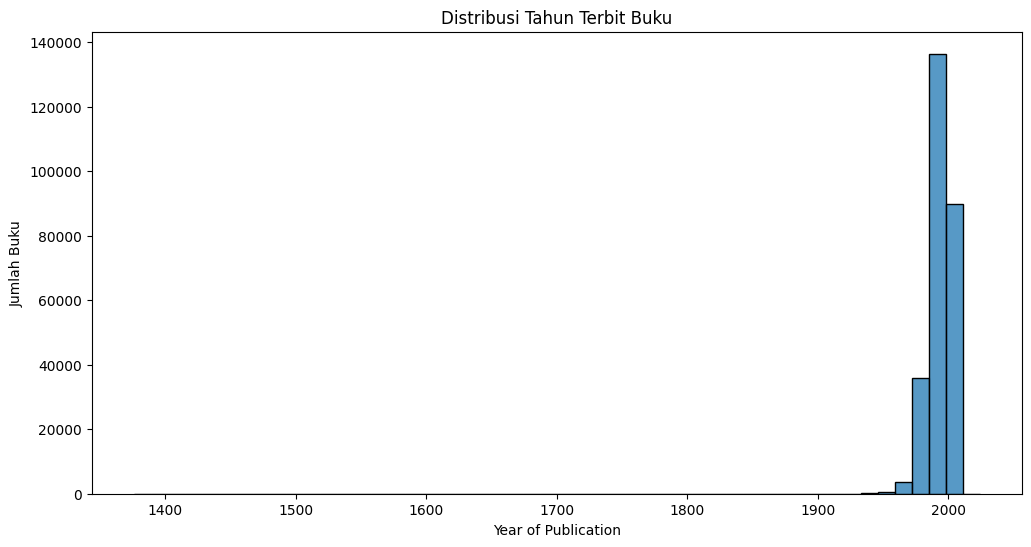

In [33]:
# Distribusi Tahun Terbit Buku
plt.figure(figsize=(12,6))
sns.histplot(books_df['Year-Of-Publication'], bins=50, kde=False)
plt.title('Distribusi Tahun Terbit Buku')
plt.xlabel('Year of Publication')
plt.ylabel('Jumlah Buku')
plt.show()

melakukan pengecekan distribusi tahun terbit buku, paling banyak buku di terbitkan pada rentang waktu 1950 hingga 2010

<ipython-input-34-173956b87ebb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")


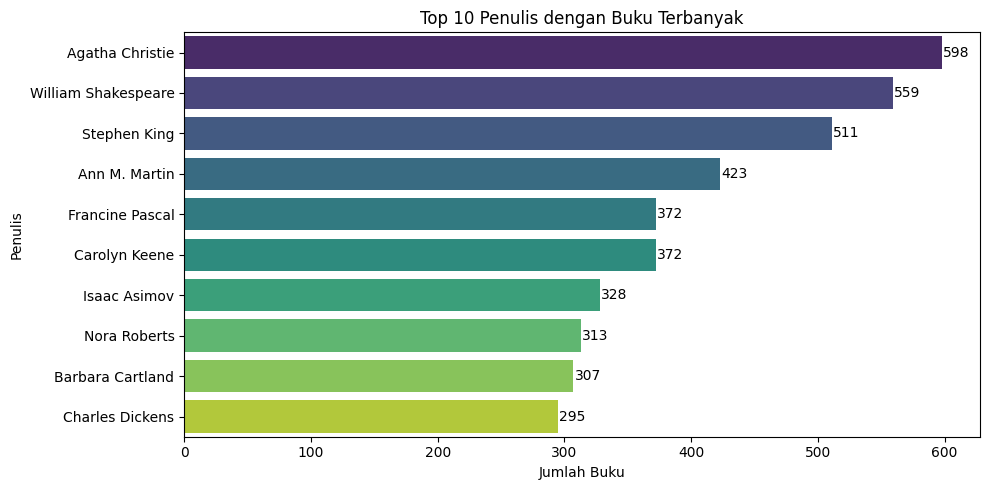

In [34]:
top_authors = books_df['Book-Author'].value_counts().head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")
plt.title('Top 10 Penulis dengan Buku Terbanyak')
plt.xlabel('Jumlah Buku')
plt.ylabel('Penulis')

# Tambahkan angka di ujung bar
for i, v in enumerate(top_authors.values):
    ax.text(v + 1, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()


agtatha christie merupakan penulis buku terbanyak dengan nilai 598 buku

<ipython-input-35-19f6f078031c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="viridis")


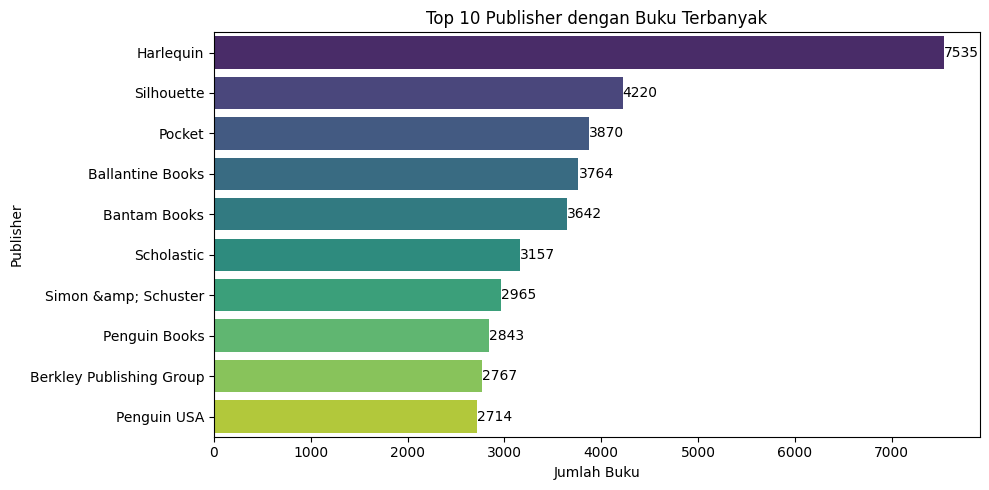

In [35]:
top_publishers = books_df['Publisher'].value_counts().head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="viridis")
plt.title('Top 10 Publisher dengan Buku Terbanyak')
plt.xlabel('Jumlah Buku')
plt.ylabel('Publisher')

# Tambahkan angka di ujung bar
for i, v in enumerate(top_publishers.values):
    ax.text(v + 1, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

harlequin menjadi penyumbang buku terbanyak dengan mempublikasi 7535 buku

<ipython-input-36-a483b93911d5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Book-Rating', data=ratings_df, palette="coolwarm")


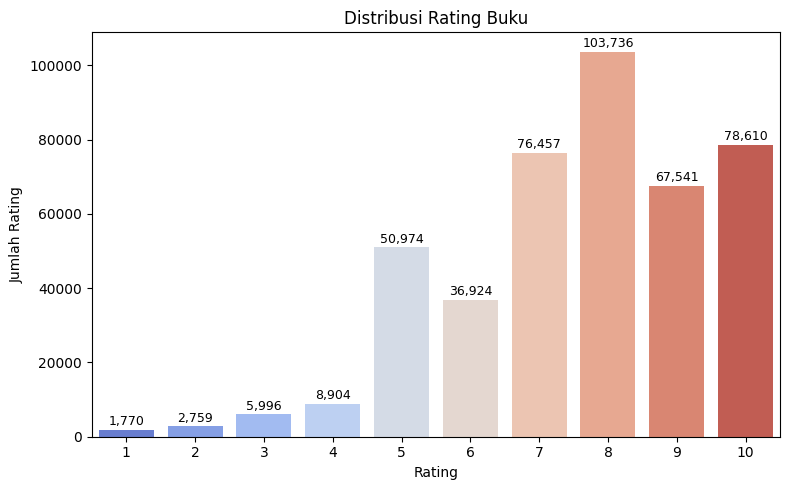

In [36]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Book-Rating', data=ratings_df, palette="coolwarm")
plt.title('Distribusi Rating Buku')
plt.xlabel('Rating')
plt.ylabel('Jumlah Rating')

# Tambahkan angka di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 500,  # naikkan sedikit biar nggak nabrak
            f'{int(height):,}',  # pakai pemisah ribuan
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


buku ternbanyak di rating dengan jumlah 8 rating sebanyak 103,736 ini menunjukkan bahwa pengguna lebih banyak melakukan rating 8

# Eda Multivariate

<ipython-input-37-ddc723488a11>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_authors['mean'], y=top_authors.index, palette='magma')


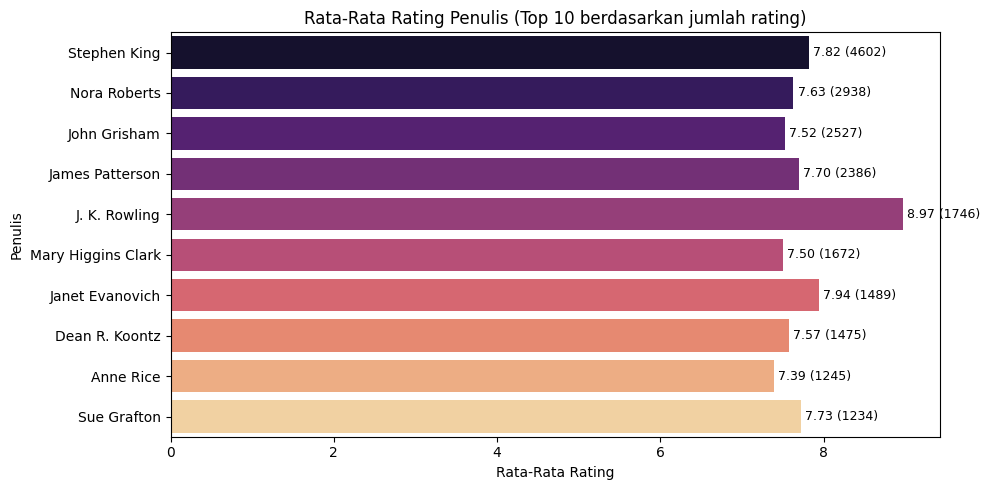

In [37]:
# Gabungkan ratings dengan book author
merged = ratings_df.merge(books_df[['ISBN', 'Book-Author']], on='ISBN', how='left')

# Hitung rata-rata dan jumlah rating per penulis
top_authors = (
    merged.groupby('Book-Author')['Book-Rating']
    .agg(['count', 'mean'])
    .sort_values(by='count', ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10,5))
ax = sns.barplot(x=top_authors['mean'], y=top_authors.index, palette='magma')
plt.title('Rata-Rata Rating Penulis (Top 10 berdasarkan jumlah rating)')
plt.xlabel('Rata-Rata Rating')
plt.ylabel('Penulis')

# Tambahkan angka rata-rata di ujung bar
for i, (mean_rating, count_rating) in enumerate(zip(top_authors['mean'], top_authors['count'])):
    ax.text(mean_rating + 0.05, i,
            f'{mean_rating:.2f} ({count_rating})',  # tampilkan rata-rata dan jumlah rating
            va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


J.k Rowling mendapatkan rata rata penulis buku berdasarkan jumlah rating terbanyak, rata ratanya 8.97 dengan nilai asli 1746

# Filtering

In [38]:
#Filter Buku dengan Rating Terbanyak
book_counts = ratings_df['ISBN'].value_counts()
popular_books = book_counts[book_counts >= 10].index

filtered_ratings = ratings_df[ratings_df['ISBN'].isin(popular_books)]

#Filter User Aktif
user_counts = filtered_ratings['User-ID'].value_counts()
active_users = user_counts[user_counts >= 5].index

filtered_ratings = filtered_ratings[filtered_ratings['User-ID'].isin(active_users)]

#Sinkronisasi ke books_df
filtered_books_df = books_df[books_df['ISBN'].isin(filtered_ratings['ISBN'].unique())].copy()

print(f'Jumlah data rating sebelum filter : {len(ratings_df):,}')
print(f'Jumlah data rating setelah filter  : {len(filtered_ratings):,}')
print(f'Jumlah user unik setelah filter    : {filtered_ratings["User-ID"].nunique():,}')
print(f'Jumlah buku unik setelah filter    : {filtered_ratings["ISBN"].nunique():,}')

Jumlah data rating sebelum filter : 433,671
Jumlah data rating setelah filter  : 92,449
Jumlah user unik setelah filter    : 6,029
Jumlah buku unik setelah filter    : 5,633


melakukan filtering data yang akan digunakan untuk proses rekomendasi, ini dilakukan untuk menunjang efisiensi komputasi

In [39]:
train_ratings, test_ratings = train_test_split(filtered_ratings, test_size=0.2, random_state=42)

print(f"Jumlah data latih: {len(train_ratings):,}")
print(f"Jumlah data uji  : {len(test_ratings):,}")

Jumlah data latih: 73,959
Jumlah data uji  : 18,490


melakukan split dataset dengan perbandingan 80:20

In [40]:
# Sinkronisasi books_df yang dipakai dengan ISBN di train_ratings
train_books_df = filtered_books_df[filtered_books_df['ISBN'].isin(train_ratings['ISBN'].unique())].copy()
train_books_df = train_books_df.reset_index(drop=True)

melakukan sinkronisasi antara isbn yang dipakai dengan isbn yang di training

In [41]:
# Gabungkan fitur teks
train_books_df['combined_features'] = (
    train_books_df['Book-Title'].fillna('') + ' ' +
    train_books_df['Book-Author'].fillna('') + ' ' +
    train_books_df['Publisher'].fillna('')
)

menggabungkan fitur

In [42]:
# TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(train_books_df['combined_features'])

melakukan TFIDF dan menyertakan stopwords bahasa inggris juga

In [43]:
tfidf_matrix.shape

(5373, 7170)

hasil matriks tfidf

In [44]:
# Cosine Similarity antar buku
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [48]:
# Simpan ke dataframe untuk akses
cosine_sim_df = pd.DataFrame(cosine_sim, index=train_books_df.index, columns=train_books_df.index)

digunakan untuk menghitung kemiripan antar seluruh pasangan buku dalam tfidf_matrix

# Content Based

In [49]:
def recommend_books_content_based_eval(book_title, top_n=5):
    # Cari index buku berdasarkan judul di data latih
    idx_list = train_books_df[train_books_df['Book-Title'].str.lower() == book_title.lower()].index
    if len(idx_list) == 0:
        return f"Buku berjudul '{book_title}' tidak ditemukan di data latih."

    idx = idx_list[0]

    # Ambil skor similarity buku lain ke buku ini dari cosine similarity train
    sim_scores = list(enumerate(cosine_sim_df[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Lewati buku itu sendiri
    sim_scores = sim_scores[1:top_n+1]

    # Ambil index buku-buku rekomendasi
    book_indices = [i[0] for i in sim_scores]

    # Ambil info buku dari dataframe train
    rekomendasi = train_books_df.iloc[book_indices][['Book-Title', 'Book-Author', 'Publisher']]
    rekomendasi['Similarity Score'] = [i[1] for i in sim_scores]

    return rekomendasi.reset_index(drop=True)

membuat fungsi untuk melakukan rekomendasi Content based filtering, disini di filter berdasarkan judul buku, penulis, dan penerbit, data yang digunakan adalah data yang sudah di split tadi

In [50]:
train_books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,combined_features
0,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,The Kitchen God's Wife Amy Tan Putnam Pub Group
1,0440234743,The Testament,John Grisham,1999,Dell,The Testament John Grisham Dell
2,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,Beloved (Plume Contemporary Fiction) Toni Morr...
3,0609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press,Our Dumb Century: The Onion Presents 100 Years...
4,0971880107,Wild Animus,Rich Shapero,2004,Too Far,Wild Animus Rich Shapero Too Far


In [51]:
recommend_books_content_based_eval("The Kitchen God's Wife", top_n=5)

,Book-Title,Book-Author,Publisher,Similarity Score
0,The Kitchen God's Wife,Amy Tan,Ivy Books,0.804881
1,The Hundred Secret Senses,Amy Tan,Putnam Pub Group,0.584710
2,The Bonesetter's Daughter,Amy Tan,Putnam Publishing Group,0.486882
3,Joy Luck Club,Amy Tan,Putnam Publishing Group,0.465584
4,The Bonesetter's Daughter,Amy Tan,Ballantine Books,0.377191


mencoba melakukan pengetesan pada buku The Kitchen God's Wife berdasarkan hasil top-n didapati buku yang memiliki kemiripan berdasarkan kontennya baik itu judul buku, penulis, dan penerbit

# collaborative filtering

In [52]:
#mapping
user_ids = filtered_ratings['User-ID'].unique().tolist()
isbn_ids = filtered_ratings['ISBN'].unique().tolist()

melakukan mapping untuk proses collaborative filtering

In [53]:
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
isbn2isbn_encoded = {x: i for i, x in enumerate(isbn_ids)}

In [54]:
filtered_ratings['user'] = filtered_ratings['User-ID'].map(user2user_encoded)
filtered_ratings['book'] = filtered_ratings['ISBN'].map(isbn2isbn_encoded)

In [55]:
num_users = len(user2user_encoded)
num_books = len(isbn2isbn_encoded)

encoding data

In [56]:
#Normalisasi rating ke skala 0–1
min_rating = filtered_ratings['Book-Rating'].min()
max_rating = filtered_ratings['Book-Rating'].max()

normalisasi data rating minimum dan maksimum

In [57]:
filtered_ratings['rating'] = filtered_ratings['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating))

In [58]:
x = filtered_ratings[['user', 'book']].values
y = filtered_ratings['rating'].values

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

melakukan splitting ulang

In [59]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_books, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)

        self.book_embedding = layers.Embedding(
            num_books,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.book_bias = layers.Embedding(num_books, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias = self.book_bias(inputs[:, 1])

        dot_user_book = tf.reduce_sum(user_vector * book_vector, axis=1, keepdims=True)
        x = dot_user_book + user_bias + book_bias
        return tf.nn.sigmoid(x)

model = RecommenderNet(num_users, num_books, embedding_size=50)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

membangun model collaborative learning menggunakn RecomenderNet

In [60]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_val, y_val)
)

Epoch 1/10
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.6780 - root_mean_squared_error: 0.3134 - val_loss: 0.6301 - val_root_mean_squared_error: 0.2706
Epoch 2/10
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.6024 - root_mean_squared_error: 0.2468 - val_loss: 0.5654 - val_root_mean_squared_error: 0.2057
Epoch 3/10
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.5370 - root_mean_squared_error: 0.1766 - val_loss: 0.5484 - val_root_mean_squared_error: 0.1847
Epoch 4/10
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.5131 - root_mean_squared_error: 0.1452 - val_loss: 0.5451 - val_root_mean_squared_error: 0.1786
Epoch 5/10
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.4980 - root_mean_squared_error: 0.1236 - val_loss: 0.5456 - val_root_mean_squared_error: 0.1769
Epoch 6/10
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.4885 - root_mean_squared_error: 0.1058 - val_loss: 0.5478 - val_root_mean_squared_error: 0.1772
Epoch 7/10
1156/1156 ━━━━━━━━━━━━━

melakukan training model

In [61]:
# Buat reverse dictionary
user_encoded2user = {v: k for k, v in user2user_encoded.items()}
isbn_encoded2isbn = {v: k for k, v in isbn2isbn_encoded.items()}

melakukan reverse dictionary dari encoding yang terlah di lakukan di awal tadi

In [62]:
def recommend_books_for_user(user_id, model, filtered_ratings, filtered_books_df, top_k=10):
    # Cek user sudah di encoding belum
    if user_id not in user2user_encoded:
        print("User ID tidak ditemukan!")
        return

    user_encoded = user2user_encoded[user_id]

    # Ambil buku yang sudah pernah dibaca user
    books_read = filtered_ratings[filtered_ratings['User-ID'] == user_id]['ISBN'].tolist()

    # Cari buku yang belum dibaca user
    books_not_read = filtered_books_df[~filtered_books_df['ISBN'].isin(books_read)]['ISBN'].tolist()

    books_not_read = [isbn for isbn in books_not_read if isbn in isbn2isbn_encoded]
    books_not_read_encoded = [[isbn2isbn_encoded[isbn]] for isbn in books_not_read]
    user_array = np.array([[user_encoded]] * len(books_not_read_encoded))

    user_book_array = np.hstack((user_array, books_not_read_encoded))

    # Prediksi rating untuk semua buku yang belum dibaca
    ratings = model.predict(user_book_array).flatten()

    # Ambil index buku dengan rating tertinggi
    top_indices = ratings.argsort()[-top_k:][::-1]

    # Ambil ISBN buku rekomendasi berdasarkan index terbaik
    recommended_isbns = [books_not_read[i] for i in top_indices]

    # Tampilkan hasil rekomendasi
    print(f"Showing recommendations for user: {user_id}")
    print("="*30)

    print("Books with high ratings from user:")
    print("-"*30)
    # Ambil buku yang user sudah baca dengan rating tertinggi
    top_books_read = (
        filtered_ratings[filtered_ratings['User-ID'] == user_id]
        .sort_values(by='Book-Rating', ascending=False)
        .head(5)['ISBN']
        .tolist()
    )
    for isbn in top_books_read:
        book_info = filtered_books_df[filtered_books_df['ISBN'] == isbn].iloc[0]
        print(f"{book_info['Book-Author']} - {book_info['Book-Title']}")

    print("-"*30)
    print("Top book recommendations:")
    print("-"*30)
    for isbn in recommended_isbns:
        book_info = filtered_books_df[filtered_books_df['ISBN'] == isbn].iloc[0]
        print(f"{book_info['Book-Author']} - {book_info['Book-Title']}")

membuat fungsi untuk rekomendasi

In [63]:
user_example = filtered_ratings['User-ID'].sample(1).iloc[0]
recommend_books_for_user(user_example, model, filtered_ratings, filtered_books_df)

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Showing recommendations for user: 43163
Books with high ratings from user:
------------------------------
Patricia MacLachlan - Sarah, Plain and Tall (Sarah, Plain and Tall)
Sue Monk Kidd - The Secret Life of Bees
Billie Letts - Where the Heart Is (Oprah's Book Club (Paperback))
Alice Sebold - The Lovely Bones: A Novel
Alice Hoffman - Practical Magic
------------------------------
Top book recommendations:
------------------------------
Helene Hanff - 84 Charing Cross Road
Jodi Picoult - My Sister's Keeper : A Novel (Picoult, Jodi)
J. R. R. Tolkien - The Two Towers (The Lord of the Rings, Part 2)
Douglas Adams - More Than Complete Hitchhiker's Guide
Mark Haddon - The Curious Incident of the Dog in the Night-Time (Vintage Contemporaries)
J. K. Rowling - Harry Potter and the Chamber of Secrets Postcard Book
Audrey Niffenegger - The Time Traveler's Wife
Betty Smith - A Tree Grows in Brooklyn
Elie Wiesel - Night
Richard Adams - Watership Down


hasil rekomendasi menggunakn RecomenderNet

# Eval

## Content Base

In [86]:
def precision_recall_at_k(user_id, model, k=5):
    # Buku yang pernah diberi rating oleh user
    read_books = filtered_ratings[filtered_ratings['User-ID'] == user_id]['ISBN'].tolist()
    if len(read_books) < k:
        return None, None

    last_read = read_books[-1]

    if last_read not in train_books_df['ISBN'].values:
        return None, None

    book_title = train_books_df[train_books_df['ISBN'] == last_read]['Book-Title'].values[0]

    # Rekomendasi dari model
    rekomendasi = recommend_books_content_based_eval(book_title, top_n=k)
    if isinstance(rekomendasi, str):
        return None, None

    recommended_titles = rekomendasi['Book-Title'].tolist()

    # Buku yang juga pernah dibaca user yang muncul di rekomendasi = relevan
    relevant_titles = train_books_df[train_books_df['ISBN'].isin(read_books)]['Book-Title'].tolist()

    true_positives = len(set(recommended_titles) & set(relevant_titles))
    precision = true_positives / k
    recall = true_positives / len(relevant_titles) if relevant_titles else 0

    return precision, recall

fungsi untuk mengevaluasi content based dengan skema
- mengambil user secara acak.
- menggunakan buku terakhir yang dibaca user sebagai query untuk sistem CBF.
- Bandingkan rekomendasi dengan buku lain yang pernah user baca → yang muncul = relevan.
- Hitung Precision@5 dan Recall@5 sebagai metrik.

In [87]:
sample_users = filtered_ratings['User-ID'].drop_duplicates().sample(5, random_state=42)
results = []

for uid in sample_users:
    p, r = precision_recall_at_k(uid, model=None, k=5)
    if p is not None:
        results.append((uid, p, r))

In [88]:
# Hasil
results_df = pd.DataFrame(results, columns=["User-ID", "Precision@5", "Recall@5"])
print(results_df)
print("\nRata-rata Precision@5:", results_df["Precision@5"].mean())
print("Rata-rata Recall@5:", results_df["Recall@5"].mean())

   User-ID  Precision@5  Recall@5
0    85993          0.0  0.000000
1    46293          0.0  0.000000
2   270801          0.0  0.000000
3   103315          0.0  0.000000
4   250832          0.2  0.142857

Rata-rata Precision@5: 0.04
Rata-rata Recall@5: 0.02857142857142857


Hasil eval nya cukup kecil, diduga dikarenakan melakukan filtering data ekstrim pada saat preprocessing, sehingga konten yang dijadikan patokan tersingkirkan cukup banyak

## Collaborative

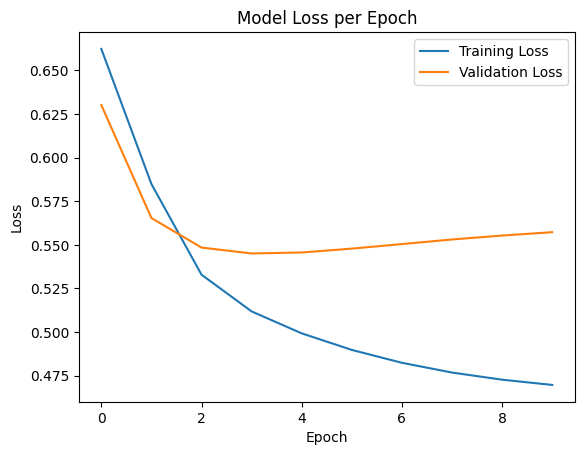

In [64]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Visualisasi model Loss pada train dan validasi

In [65]:
y_train_pred = model.predict(x_train).flatten()
y_val_pred = model.predict(x_val).flatten()

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)

print(f'MSE Train: {mse_train:.6f}, RMSE Train: {rmse_train:.6f}')
print(f'MSE Val: {mse_val:.6f}, RMSE Val: {rmse_val:.6f}')

2312/2312 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
578/578 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MSE Train: 0.001993, RMSE Train: 0.044639
MSE Val: 0.032780, RMSE Val: 0.181052


hasil Mse dan Rmse pada model yang telah di buat mendekati nilai kecil, tandanya model cukup baik dalam mengenali data